In [1]:
# Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)

# In addition, you will be expected to produce the following three pie charts:

# * % of Total Fares by City Type
# * % of Total Rides by City Type
# * % of Total Drivers by City Type

import os
import pandas as pd
import matplotlib.pyplot as plt

cityfile = os.path.join('raw_data', 'city_data.csv')
ridefile = os.path.join('raw_data', 'ride_data.csv')
city = pd.read_csv(cityfile)
ride = pd.read_csv(ridefile)

In [2]:
merged = city.merge(ride, on='city', how='inner')
# merged.sort_values(by='city')

In [3]:
#filter by city type
rural = merged.loc[merged["type"] == "Rural",:]
urban = merged.loc[merged["type"] == "Urban",:]
suburban = merged.loc[merged["type"] == "Suburban",:]
# urban.head()

In [4]:
#Average fare per city and driver count by city type
urban_av = urban.groupby('city').mean()
# urban_av.head()
suburban_av = suburban.groupby('city').mean()
# suburban.head()
rural_av = rural.groupby('city').mean()
rural_av.head()

,driver_count,fare,ride_id
city,,,
East Leslie,9.0,33.660909,6.051052e+12
East Stephen,6.0,39.053000,5.306327e+12
East Troybury,3.0,33.244286,5.948234e+12
Erikport,3.0,30.043750,6.883015e+12
Hernandezshire,10.0,32.002222,5.206210e+12


In [5]:
#area for bubbles per driver count type
rural_area = (rural_av['driver_count'])**2 
# rural_area
suburban_area = (suburban_av['driver_count'])**2
urban_area = (urban_av['driver_count'])**2


In [6]:
#total number of rides per city type
urban_total = urban["city"].value_counts()
suburban_total = suburban["city"].value_counts()
rural_total = rural['city'].value_counts()
# urban_total

In [7]:
total_rides = ride["city"].value_counts()
total_rides.count()

125

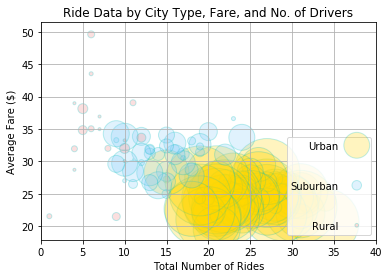

Each bubble represents a city where the size of the bubble represents the average fare. Urban cities are represented by the gold bubbles, rural by the coral bubbles, and suburban by the light sky blue. Total drivers is represented along the x-axis, while total number of rides is represented along the y-axis.


In [8]:
# * Average Fare ($) Per City - urban_av['fare']
# * Total Number of Rides Per City - urban_total
# * Total Number of Drivers Per City - area of bubble
# * City Type (Urban, Suburban, Rural) - color of bubble
# plt.figure(figsize=(20,10))

#urban plot
plt.scatter(urban_total, urban_av['fare'], c='Gold', edgecolor='cccccc', s=urban_area, alpha=0.25, label = "Urban")
#suburban
plt.scatter(suburban_total, suburban_av['fare'], c='lightskyblue', edgecolor='cccccc', s=suburban_area, alpha=0.25, label = "Suburban")
#rural
plt.scatter(rural_total,rural_av['fare'], c='lightcoral',edgecolor='cccccc', s=rural_area, alpha=0.25,label = "Rural")
plt.legend(loc='lower right', labelspacing=3, markerfirst=False, scatteryoffsets=[.5], markerscale=.5)

plt.xlim(0, 40)
plt.ylim()
plt.grid(True)
plt.title('Ride Data by City Type, Fare, and No. of Drivers')
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare ($)")

plt.show()

print("Each bubble represents a city where the size of the bubble represents the average fare. Urban "
      "cities are represented by the gold bubbles, rural by the coral bubbles, and suburban by the "
      "light sky blue. Total drivers is represented along the x-axis, while total number of rides "
      "is represented along the y-axis.")

(-1.25, 1.25, -1.25, 1.25)

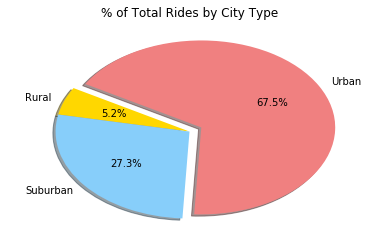

In [9]:
merged_groupby_data=(merged.groupby(['type']))
x_axis=merged_groupby_data['ride_id'].count()
explode = (0,0,0.1)
colors = ["Gold", "LightSkyBlue", 'LightCoral']
x_axis.plot(kind='pie',autopct="%1.1f%%", shadow=True,colors=colors, explode=explode, startangle=150)
plt.title("% of Total Rides by City Type")
plt.axis("off")

(-1.25, 1.25, -1.25, 1.25)

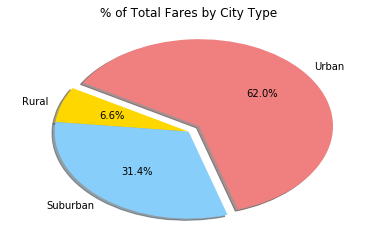

In [10]:
# * % of Total Fares by City Type
merged_groupby_data=(merged.groupby(['type']))
x_axis=merged_groupby_data['fare'].sum()
explode = (0,0,0.1 )
colors = ["Gold", "LightSkyBlue", 'LightCoral']
x_axis.plot(kind='pie',autopct="%1.1f%%", shadow=True,colors=colors,explode=explode, startangle=150)
plt.title("% of Total Fares by City Type")
plt.axis("off")

(-1.25, 1.25, -1.25, 1.25)

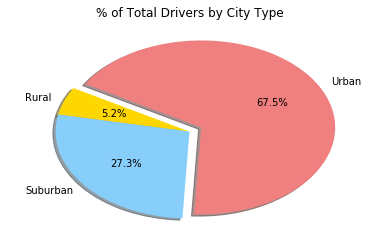

In [11]:
# * % of Total Drivers by City Type
merged_groupby_data=(merged.groupby(['type']))
x_axis=merged_groupby_data['driver_count'].count()
explode = (0,0,0.1 )
colors = ["Gold", "LightSkyBlue", 'LightCoral']
x_axis.plot(kind='pie',autopct="%1.1f%%", shadow=True,colors=colors, explode=explode, startangle=150)
plt.title("% of Total Drivers by City Type")
plt.axis("off")